# Set working directory and import modules

In [48]:
import os
# Change working directory to the root of the repository (assumes notebook working directory is `tutorials`)
os.chdir('/Users/breinsta/Desktop/alfa_research/donkey_ge/')
import main
from util.plot_ipd import plot_iterated_prisoners_dilemma, plot_ipd_from_file
from fitness.game_theory_game import PrisonersDilemma
from typing import List, Tuple

# Run Iterated Prisoners Dilemma with two different player strategies

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


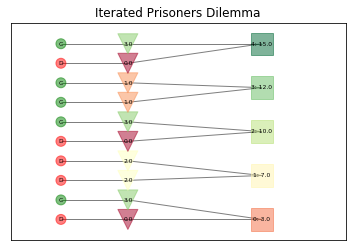

In [49]:
# Strategy for always cooperate
player_1 = lambda h, i: ["D","D","D","C"][i % 4]
# Strategy for cooperate if opponent cooperated previous turn
player_2 = lambda h, i: ["C","D","C","C"][i % 4]
n_iterations = 5
memory_size = 1
# Setup a prisoners dilemma engagment
pd = PrisonersDilemma(n_iterations=n_iterations, memory_size=memory_size, store_stats=True, out_file_name=PrisonersDilemma.DEFAULT_OUT_FILE)
# Run the strategies against each other
sentences, histories = pd.run(player_1=player_1, player_2=player_2)
# Plot the choices and the payoffs from the engagement
plot_iterated_prisoners_dilemma(sentences, pd.revise_history(histories), out_path='.')

# Run the heuristic search

In [50]:
# Set to use the configuration file and output directory
args = ["-o", "tmp", "-f", "tests/configurations/iterated_prisoners_dilemma.yml"]
_ = main.main(args)

Namespace(coev=False, configuration_file='tests/configurations/iterated_prisoners_dilemma.yml', output_dir='tmp')
Setting random seed: 1 0.13436
donkey_ge settings: {'population_size': 4, 'max_length': 10, 'elite_size': 1, 'generations': 5, 'tournament_size': 2, 'seed': 1, 'crossover_probability': 0.8, 'mutation_probability': 0.1, 'codon_size': 127, 'integer_input_element_max': 1000, 'bnf_grammar': 'tests/grammars/iterated_prisoners_dilemma.bnf', 'fitness_function': {'name': 'IteratedPrisonersDilemma', 'opponent': "lambda h, i: 'C'", 'n_iterations': 10}, 'output_dir': 'tmp', 'coev': False, 'brynset': 'hello'}
Gen:0 t:0.001 fit_ave:-5.00+-4.528 size_ave:3.50+-0.866 length_ave:10.00+-0.000 Ind: lambda h, i: "D"; -0.0
Gen:1 t:0.001 fit_ave:-2.50+-4.330 size_ave:3.00+-1.000 length_ave:10.50+-0.866 Ind: lambda h, i: "D"; -0.0
Gen:2 t:0.000 fit_ave:0.00+-0.000 size_ave:3.00+-1.000 length_ave:11.50+-0.866 Ind: lambda h, i: "D"; -0.0
Gen:3 t:0.000 fit_ave:0.00+-0.000 size_ave:2.50+-0.866 lengt

In [ ]:
from util.plot_donkey_ge import plot_fitness
# Plot fitness from a search
plot_fitness(in_path="tmp")

# Run the coevlutionary search

In [ ]:
args = ["-o", "tmpcoev", "-f", "tests/configurations/coevolution_iterated_prisoners_dilemma.yml", "--coev"]
_ = main.main(args)

In [ ]:
plot_fitness(in_path="tmpcoev")